# ch05.03. 기초모델 구현 - 회귀모델 맛보기
---
* 날짜:2022.05.13
* 이름:안창덕

## 학습내용
    - 회귀 분석의 개념에 대해 이해한다
    - 단순 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 다중 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 모델링에 대한 전체적인 프로세스 과정을 이해한다. 

```
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
```

In [130]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## 단순 회귀 문제
---




|공부시간(x)|종합점수(y)|
|------|---|
|3|20|
|5|50|
|5|60|
|7|90|
|8|100|

* 데이터 정의

In [3]:
xv = np.array([3,5,5,7,8])
yv = np.array([20,50,60,90,100])

* 데이터 시각화

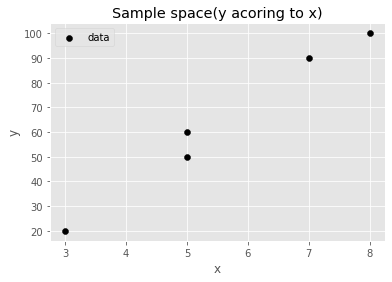

In [51]:
plt.scatter(xv,yv, c='k', label='data')
plt.legend()

plt.title('Sample space(y acoring to x)')
plt.xlabel('x')
plt.ylabel('y')

plt.show()


### **| step 1. 모델 구현**

$model(x;w) = wx$

* 모델 정의

In [9]:
def model_simple(x, w=1):
  return w*x

* 초기 모델 사용


|공부시간(x)|종합점수(y)| 예측값 ($\hat{y})$|
|------|---|--|
|3|20||3|
|5|50||5|
|5|60||5|
|7|90||7|
|8|100||8|

In [11]:
model_simple(xv)

array([3, 5, 5, 7, 8])

### **| step 2. 손실 (loss) 계산**

$loss = |(\hat{y}-y)|$

* 손실 계산 과정 정의

In [65]:
#순전파
def propagation(xv,yv,w):
  total_loss = 0
  for x, y in zip(xv, yv): #모든 샘플 x,y에 대해서
    y_pred = model_simple(x, w=w) #예측값구하기
    loss = np.abs(y_pred-y)
    total_loss += loss # 전체 샘플의 손실
  return total_loss
  #print(f'x:{x}, y{y}, y_pred:{y_pred}, loss:{loss}')

propagation(xv,yv,w=5)

180

### **| step 3. 최적화 (Optimizer)**


*  학습 파라미터 $w$를 5부터 20까지 바꿔가며 손실 계산하기


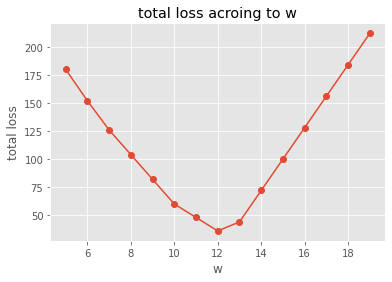

In [41]:
wv = np.arange(5,20)
total_losses = propagation(xv, yv, wv) # w값 15개에 따른 total loss 배열


plt.plot(wv,total_losses, marker='o')
#plt.legend()

plt.title('total loss acroing to w')
plt.xlabel('w')
plt.ylabel('total loss')

plt.show()



### **| step 4. 예측 (Prediction)**

* 학습 완료된 모델의 최종 손실 계산

In [64]:
w_ = 12
propagation(xv,yv,w_)

36

* 학습 완료된 모델에 대한 예측 시각화

[ 0  1  2  3  4  5  6  7  8  9 10]


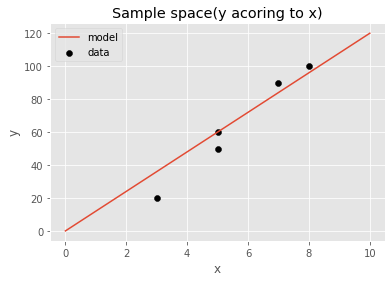

In [53]:
x_every = np.arange(11)
print(x_every)
y_preds = model_simple(x_every, w_)
#데이터시각화
plt.scatter(xv,yv, c='k', label='data')
#모델시각화
plt.plot(x_every, y_preds, label='model')

plt.title('Sample space(y acoring to x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


* 공부시간이 6시간일 때 예상 점수는?


In [54]:
model_simple(6, w_)

72

### **| step 5. 평가 (Evaluation)**

* 훈련 데이터셋

|공부시간(x)|종합점수(y)|
|------|---|
|3|20|
|5|50|
|5|60|
|7|90|
|8|100|

* 테스트 데이터셋

|공부시간(x)|종합점수(y)|
|------|---|
|1|5|
|2|15|
|5|55|
|6|80|
|7|85|

* 테스트 데이터셋 정의

In [55]:
x_tests = np.array([1,2,5,6,7])
y_tests = np.array([5,15,55,80,85])
x_tests.shape, y_tests.shape


((5,), (5,))

* 학습 완료된 모델에 테스트 데이터로 최종 손실 계산 (평가)

In [56]:
propagation(x_tests,y_tests,w_)

30

* 학습 완료된 모델에 테스트 데이터 예측 시각화

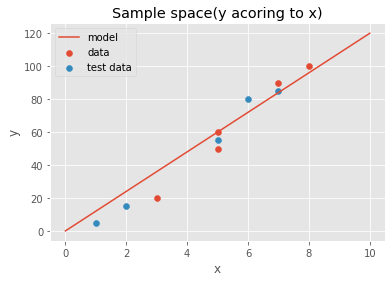

In [59]:
#데이터시각화
plt.scatter(xv,yv, label='data')
#모델시각화
plt.plot(x_every, y_preds, label='model')
# 테스트 데이터 시각화
plt.scatter(x_tests,y_tests, label='test data')

plt.title('Sample space(y acoring to x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 다중 회귀 문제
---



|공부시간|수면시간|종합점수|
|------|---|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|


* 데이터 정의

In [80]:
X = np.array([2,9,6,8,4,7,7,6,8,6]).reshape(5,2)
yv = np.array([20,50,60,90,100])
X.shape, yv.shape

((5, 2), (5,))

* 데이터 시각화

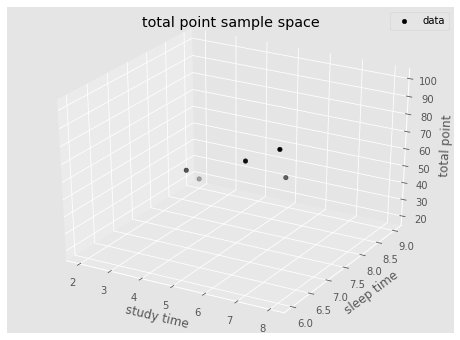

In [81]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

ax.scatter3D(X[:,0], X[:,1], yv, c='k', label='data')
ax.set_title('total point sample space')
ax.set_xlabel('study time')
ax.set_ylabel('sleep time')
ax.set_zlabel('total point')

plt.legend()
plt.show()

### **| step 1. 모델 구현**

$model(\vec{x};\vec{w}) = w_1x_1+w_2x_2$

* 모델 정의

In [82]:
def model_multi(x1, x2, w1=1, w2=1): # 찾아야하는 학습 파라미터가 2개
  return (w1*x1) + (w2*x2)


* 초기 모델 사용


|공부시간|수면시간|종합점수|예측값 ($\hat{y}$)|
|------|---|--|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|

In [83]:
model_multi(2, 9)

11

### **| step 2. 손실 (loss) 계산**

$loss = |(\hat{y}-y)|$

* 손실 계산 과정 정의

In [84]:
x1v, x2v = X[:,0], X[:,1]
model_multi(x1v, x2v, w1=5, w2=1)

array([19, 38, 27, 41, 46])

### **| step 3. 최적화 (Optimizer)**


*  학습 파라미터 $w_1$를 0부터 30, $w_2$를 -10부터 10까지 바꿔가며 손실 계산하기


In [86]:
#순전파
def propagation(X,yv,w1,w2):
  total_loss = 0
  for x, y in zip(X, yv): #모든 샘플 x,y에 대해서
    y_pred = model_multi(x[0],x[1],w1=w1,w2=w2) #예측값구하기
    loss = np.abs(y_pred-y)
    total_loss += loss # 전체 샘플의 손실
  return total_loss
  #print(f'x:{x}, y{y}, y_pred:{y_pred}, loss:{loss}')

propagation(X,yv,w1=1,w2=1)

257

* 3d플롯으로 시각화

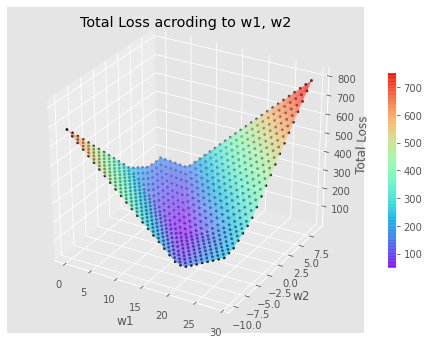

In [95]:
w1v = np.arange(0, 30)
w2v = np.arange(-10, 10)
W1,W2 = np.meshgrid(w1v,w2v)

L = propagation(X, yv, W1, W2)

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

#w1, w2에 대한 loss의 시각화
ax.scatter3D(W1, W2, L, c='k', marker='.')
surf = ax.plot_surface(W1, W2, L, cmap='rainbow', alpha=.6)
fig.colorbar(surf, shrink=.6)

ax.set_title('Total Loss acroding to w1, w2')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Total Loss')


plt.show()

### **| step 4. 예측 (Prediction)**

* 최적화된 파라미터 정의

In [103]:
L.shape, np.min(L), np.argmin(L)
w1_ = W1.flatten()[np.argmin(L)]
w2_ = W2.flatten()[np.argmin(L)]

* 학습 완료된 모델의 최종 손실 계산

In [104]:
propagation(X,yv,w1_,w2_)

45

* 학습 완료된 모델에 대한 예측 시각화

In [106]:
x1_every=np.arange(10)
x2_every=np.arange(10)
X1_every, X2_every = np.meshgrid(x1_every, x2_every)
Y_pred = model_multi(X1_every, X2_every, w1_, w2_)
X1_every.shape, X2_every.shape, Y_pred.shape

((10, 10), (10, 10), (10, 10))

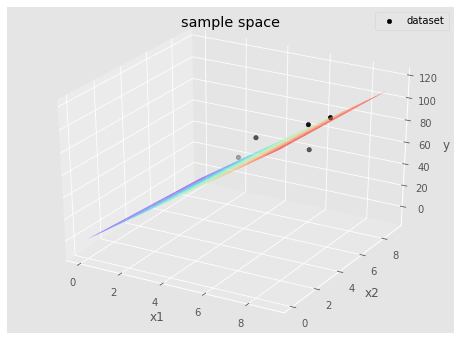

In [121]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

# 데이터 시각화
ax.scatter3D(X[:,0], X[:,1], yv, marker='o', c='k', label='dataset')
# 예측모델
ax.plot_surface(X1_every, X2_every, Y_pred, cmap='rainbow', alpha=.6)


ax.set_title('sample space')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')


ax.legend()
plt.show()

* 공부시간이 6시간이고 수면시간 5시간 일 때 예상 점수는?


In [122]:
model_multi(6,5,w1_,w2_)

73

### **| step 5. 평가 (Evaluation)**

* 훈련 데이터셋


|공부시간|수면시간|종합점수|
|------|---|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|

* 테스트 데이터셋

|공부시간|수면시간|종합점수|
|------|---|--|
|1|7|15|
|3|8|25|
|5|7|60|
|5|6|90|
|10|7|95|

* 테스트 데이터셋 정의

In [123]:
X_tests = np.array([1,7,3,8,5,7,5,6,10,7]).reshape(5,2)
y_tests = np.array([15,25,60,90,95])

* 학습 완료된 모델에 테스트 데이터로 최종 손실 계산

In [124]:
propagation(X_tests,y_tests,w1_,w2_)

76

* 학습 완료된 모델에 테스트 데이터 예측 시각화

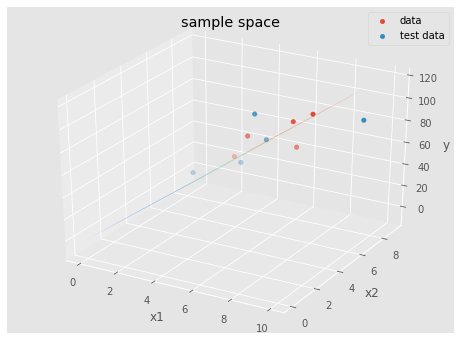

In [129]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

# 데이터 시각화
ax.scatter3D(X[:,0], X[:,1], yv, marker='o', label='data')
# 예측모델
ax.plot_surface(X1_every, X2_every, Y_pred, cmap='rainbow', alpha=.6)
# 테스트 모델
ax.scatter3D(X_tests[:,0], X_tests[:,1], y_tests, marker='o',  label='test data')

ax.set_title('sample space')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')


ax.legend()
plt.show()

## 클래스 작성하기
---

```
단순 선형회귀 분석 클래스를 작성합니다.

model = Model() # 모델 클래스가 생성됩니다.
model.fit(xs, ys) # 최적화가 진행됩니다.
model.predict(xs) # 예측을 진행합니다.
model.validation(xs, ys) # 평가를 진행합니다.
```

In [131]:
class SimpleModel():
  def __init__(self, random_state=1):
    self.w = 1                 #w=1 loss=10000
    self.loss = 10000

  def model(self, x, w):     #model x,w 값 입력하면 곱해서 반환하는 함수
    return w*x

  def propagation(self, xs, ys, w):      #propagation 순전파 함수  예측값y 에서 ys 값을 각각뺀 절대값을 모두 더한후 평균값을 반환
    total_loss = 0
    for x, y in zip(xs, ys):
      y_pred = self.model(x, w=w) 
      loss = np.abs(y_pred-y) 
      total_loss += loss 
    return total_loss/len(xs)
  
  def validation(self, x, y):                 #validation  propagation 값
    loss = self.propagation(x, y, self.w) 
    return loss

  def fit(self, x, y, grid=[-10,10]):                         #w값을 -10부터 10까지 넣어 차례대로 propagation 값을 구하다가 작으면 다음으로 넘어가고 아니면 멈춘다.
    for w in range(grid[0], grid[1]):
      loss_tmp = self.propagation(x, y, w)
      if self.loss > loss_tmp:
        self.loss = loss_tmp
        self.w = w
        print(f'w: {w}  loss:{np.round(loss_tmp,2)}')
      else:
        print(f'w: {w}  loss:{np.round(loss_tmp,2)}, stop learning')
        break
 
  def predict(self, x):                  # 예측값
    pred = self.model(x, w=self.w)
    return pred

  def plot_xy(self, x, y):
    plt.scatter(x, y, c='k', label='data')
    plt.plot(x, self.model(x, self.w), c='r', label='model')
    plt.legend()
    plt.show()
  

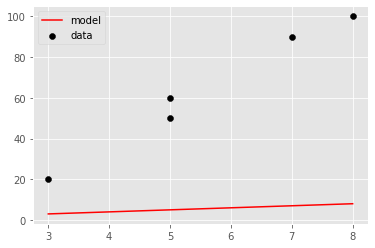

* 초기 예측값: [3 5 5 7 8]
* 초기 평가: 58.4
w: 0  loss:64.0
w: 1  loss:58.4
w: 2  loss:52.8
w: 3  loss:47.2
w: 4  loss:41.6
w: 5  loss:36.0
w: 6  loss:30.4
w: 7  loss:25.2
w: 8  loss:20.8
w: 9  loss:16.4
w: 10  loss:12.0
w: 11  loss:9.6
w: 12  loss:7.2
w: 13  loss:8.8, stop learning


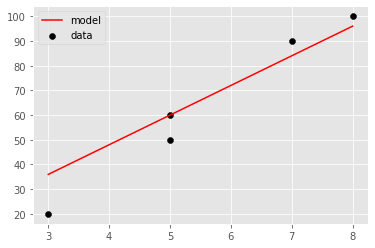

* 학습 후 예측값: [36 60 60 84 96]
* 학습 후 평가: 7.2


In [133]:
xs = np.array([3,5,5,7,8])
ys = np.array([20, 50, 60, 90, 100])

model = SimpleModel()
model.plot_xy(xs, ys)
print('* 초기 예측값:' , model.predict(xs))
print('* 초기 평가:', model.validation(xs, ys))

model.fit(xs, ys, [0, 15])            # 0부터 15까지 차례대로 w값을 바꿔가면서 propagation 값을 구해서 값이 가장 낮은 w값을 찾는다.
model.plot_xy(xs, ys)
print('* 학습 후 예측값:' , model.predict(xs))
print('* 학습 후 평가:', model.validation(xs, ys))